In [2]:
import time

start = time.time()

import copy
#specify path of file
path = r"C:\Users\Bharat Thakur\OneDrive - University Of Houston\Data Mining\proj_1\transactionDB.txt"

#path surfacebook
#path = r"C:\Users\bthak\OneDrive - University Of Houston\Data Mining\proj_1\transactionDB.txt"

#opening the file for reading
file = open(path, "r")

#reading file line by line into a single string
lines = file.readlines()

#removing \n from lines of file
lines = [x.strip() for x in lines] 

#split string into list of strings using space as delimi
trans = [x.split(' ') for x in lines]


#laodings only n transactions
n_trans_load = 5000
some_trans = copy.deepcopy(trans[0:n_trans_load])

print( n_trans_load," transactions loaded for analysis")

5000  transactions loaded for analysis


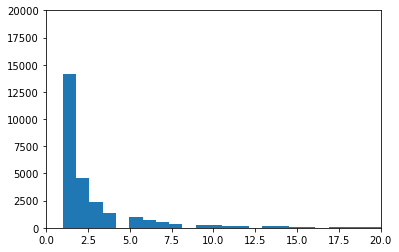

In [125]:
import time
start = time.time()



y = [ len(x) for x in trans]
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y,bins= 1000)
plt.axis([0,20,0,20000])

stop = time.time()

#print( stop - start)

In [3]:
###Replacing reviewer id  string by int 
start = time.time()
#creating unique id set
unique_id_set = set(x for l in some_trans for x in l)
#replaceing id by integer
some_trans_int = copy.deepcopy(trans[0:n_trans_load])
#
key = range(0,len(unique_id_set))
#dictionary with key as unique id int and value as reviewer id string
dict_unique_id = dict( ((i,j) for i,j in zip(key,unique_id_set)))
# recursive function to replace id by int
def nest_string_rpl(lst, match, replacmt):
    for index, item in enumerate(lst):
        if type(item) != list :
            if item == match:
                lst[index] = replacmt
        else:
            nest_string_rpl(item, match, replacmt)
#replaceing id by integer
for i in dict_unique_id.keys() :
    nest_string_rpl(some_trans_int,(dict_unique_id[i]),i)
    #print('replacemet in progress....', i ,'out of ', len(unique_id_set),'replaced')   
print('Reviewer id replaced by unique integer.')
#
stop = time.time()
print( stop - start)

Reviewer id replaced by unique integer.
141.879319190979


In [4]:
# sorting the transactions according to transaction ids     
start =time.time()
def sort_list(lis):
    for i in (lis):
        i.sort()

sort_list(some_trans_int)
print('Transaction id list sorted')
stop = time.time()

print( stop - start)
#item-id  occurence counter function for K=1 
def id_counter(lst, review_id):
    global count  
    for item in lst:  
        if type(item) == list:  
            id_counter(item, review_id)
        else:
            if item == review_id:  
                count = count + 1
    return(count)
#
dict_id_count = {}
for i in key:
    count = 0
    dict_id_count[i] = id_counter(some_trans_int, i)
#print(dict_id_count)
stop = time.time()

print( stop - start)


Transaction id list sorted
0.003001689910888672
99.4844024181366


In [27]:
#frequent item set list generation k = 1 and candidate set k = 2 ,
#also filtering only k+1 ( 2 in this case) sized transactions from all the transactions

support = 4
freq_item_set = []
for key,value in dict_id_count.items():
    if value >= support:
        freq_item_set.append(key)


# k = 2 level candidate set generation
candi_set_nxt_lvl =[]

for i in range(1,len(freq_item_set)):
    for j in range((i+1), len(freq_item_set)) :
        candi_set_nxt_lvl.append([freq_item_set[i],freq_item_set[j]])

k = 2
# filtering only k+1 size transactions from total item set
nxt_lvl_trans_set = []
[nxt_lvl_trans_set.append(i)  if len(i) >= k else next for i in some_trans_int]
nxt_lvl_trans_set

candi_set_nxt_lvl

        

[[46, 64],
 [46, 70],
 [46, 74],
 [46, 76],
 [46, 93],
 [46, 141],
 [46, 152],
 [46, 156],
 [46, 181],
 [46, 183],
 [46, 200],
 [46, 207],
 [46, 210],
 [46, 211],
 [46, 219],
 [46, 238],
 [46, 246],
 [46, 262],
 [46, 294],
 [46, 317],
 [46, 370],
 [46, 374],
 [46, 389],
 [46, 465],
 [46, 468],
 [46, 518],
 [46, 524],
 [46, 537],
 [46, 555],
 [46, 572],
 [46, 613],
 [46, 616],
 [46, 642],
 [46, 708],
 [46, 711],
 [46, 798],
 [46, 815],
 [46, 827],
 [46, 861],
 [46, 883],
 [46, 890],
 [46, 892],
 [46, 911],
 [46, 915],
 [46, 943],
 [46, 947],
 [46, 991],
 [46, 1004],
 [46, 1022],
 [46, 1044],
 [46, 1069],
 [46, 1090],
 [46, 1110],
 [46, 1118],
 [46, 1120],
 [46, 1140],
 [46, 1155],
 [46, 1186],
 [46, 1213],
 [46, 1218],
 [46, 1237],
 [46, 1287],
 [46, 1315],
 [46, 1326],
 [46, 1337],
 [46, 1350],
 [46, 1372],
 [46, 1420],
 [46, 1467],
 [46, 1488],
 [46, 1496],
 [46, 1510],
 [46, 1517],
 [46, 1520],
 [46, 1536],
 [46, 1551],
 [46, 1564],
 [46, 1567],
 [46, 1592],
 [46, 1688],
 [46, 1692],

In [35]:
#next level candidate are being split to sub candidates. Then all the sub candidates are checked
# if present in a particular item in new item set ( min length of item is equal to len of sub candidates)
# if sub candidate is present then count in dictionary = 1 else 0

# sup is support here

start = time.time()
def nxt_lvl_freq_item(candi_set_nxt_lvl,nxt_lvl_trans_set,sup ):
    lis = []
    count = 0 
    freq_item_nxt_lvl = []
    for candidate in candi_set_nxt_lvl:
        j = 0
        #print('candidate',candidate)
        for item in nxt_lvl_trans_set:
            #print('item',item)
            for sub_candidate in candidate:
                #print(sub_candidate)
                count = 0
                if sub_candidate in item:
                    #print('sub_candidate',sub_candidate,' found in ',item)
                    count = 1
                    next
                else:
                    #print('sub_candidate',sub_candidate,'not found in ',item)
                    count = 0
                    break
            if count == 1:
                #means all sub_candidate in item
                #print(candidate,'is in item',item)
                j = j +1
    #print(j, candidate)
        if j != 0:      
            lis.append([candidate,j])
        if j>= sup:
            freq_item_nxt_lvl.append(candidate)
    return(freq_item_nxt_lvl)


freq_item_set = nxt_lvl_freq_item(candi_set_nxt_lvl,nxt_lvl_trans_set,sup)


candi_set_nxt_lvl = []

for i in freq_item_set:
    candi_set_nxt_lvl.append(set(i))

KeyboardInterrupt: 

In [36]:
candi_set_nxt_lvl.append(set(i))


TypeError: 'int' object is not iterable

In [8]:
#function for subsets
def selfJoin(l) : 
    ret = []
    for i, outer in enumerate(l):
        for inner in l[i + 1:]:
            #print(inner)
            inter = inner.intersection(outer)
            if len(inter) > 0 and (outer.union(inner) in ret) == False:  
                ret.append(outer.union(inner))
                #print(ret)
    return ret



    

In [34]:
#m is k-1 level check
#subset is subset of all the 
x = selfJoin(candi_set_nxt_lvl)
next_lvl_freq_item_set = []
import itertools
def findsubsets(S,m):
    return set(itertools.combinations(S, m))


for i,j in zip(x,subset):
    
    
    if all(candi in freq_item_set for candi in j) :
        i = list(i)
        i.sort()
        next_lvl_freq_item_set.append(i)

next_lvl_freq_item_set
tmp = next_lvl_freq_item_set

AttributeError: 'list' object has no attribute 'intersection'

In [29]:
subset

[[[6195, 46], [6195, 9485], [9485, 46]],
 [[9485, 46], [11285, 46], [11285, 9485]],
 [[1859, 70], [1859, 3077], [3077, 70]],
 [[70, 4382], [3077, 70], [3077, 4382]],
 [[3077, 70], [5218, 70], [5218, 3077]],
 [[3077, 70], [5716, 70], [5716, 3077]],
 [[3077, 70], [6913, 70], [6913, 3077]],
 [[3077, 70], [8664, 70], [8664, 3077]],
 [[3077, 70], [10668, 70], [10668, 3077]],
 [[1186, 141], [2856, 141], [2856, 1186]],
 [[1186, 141], [8569, 141], [8569, 1186]],
 [[1186, 141], [9264, 141], [9264, 1186]],
 [[141, 9983], [1186, 141], [1186, 9983]],
 [[141, 12186], [1186, 141], [1186, 12186]],
 [[141, 4023], [1186, 141], [1186, 4023]],
 [[2856, 141], [2856, 8569], [8569, 141]],
 [[2856, 141], [2856, 9264], [9264, 141]],
 [[141, 9983], [2856, 141], [2856, 9983]],
 [[2856, 141], [2856, 12186], [12186, 141]],
 [[8569, 141], [9264, 141], [9264, 8569]],
 [[141, 9983], [8569, 141], [8569, 9983]],
 [[8569, 141], [8569, 12186], [12186, 141]],
 [[141, 9983], [9264, 141], [9264, 9983]],
 [[9264, 141], [926

In [25]:
itertools.combinations(candi_set_nxt_lvl,k-1)
next(itertools.combinations(candi_set_nxt_lvl,k-1))

({46, 9485}, {70, 3077})

In [329]:



k = 3
temp = []
[temp.append(i)  if len(i) >= k else next for i in nxt_lvl_trans_set]
nxt_lvl_trans_set = temp



freq_item_set = next_lvl_freq_item_set

candi_set_nxt_lvl = []
for i in freq_item_set:
    candi_set_nxt_lvl.append(set(i))

x = selfJoin(candi_set_nxt_lvl)

import itertools
def findsubsets(S,m):
    return set(itertools.combinations(S, m))

subset = []
for j in x:
    sub_sub = []
    i = findsubsets(j,k) 
    
    if all(candi in freq_item_set for candi in i) :
        print(j)
        subset.append(j)
        
    
subset
    


[]

In [303]:
subset[0][0] #notice the list levels in subset could be an issue, this was not the case with the earlier iteration

[8459, 632, 5626]

In [326]:


next_lvl_freq_item_set = []


for i,j in zip(x,subset):
    
    
    if all(candi in freq_item_set for candi in j) :
        print(all(candi in freq_item_set for candi in j))
        i = list(i)
        i.sort()
        next_lvl_freq_item_set.append(i)
    print(all(candi in freq_item_set for candi in j))


In [261]:
freq_item_set = next_lvl_freq_item_set

candi_set_nxt_lvl = []
for i in freq_item_set:
    candi_set_nxt_lvl.append(set(i))

x = selfJoin(candi_set_nxt_lvl)

In [265]:
subset

[]

In [323]:
level3_freq_item_set = next_lvl_freq_item_set 
level3_candi = candi_set_nxt_lvl